In [24]:
import numpy as np
import colocationship as cl
import copy

%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_hdf('/scratch/share/datasets/a21/a21_checkins_30k_users.h5', key='table')

In [149]:
df_network = pd.read_hdf('/scratch/share/datasets/a21/a21_checkins_with_network.h5', key='table')

In [150]:
df_network.to_csv('a21_data.csv', index=False)

In [13]:
egolist = list(set(df_network['user_id'].tolist()))
alterlist = list(set(df_network['tgt'].tolist()))

In [15]:
print(len(egolist), len(alterlist))

35338 3534518


In [17]:
df_part = df_network[df_network['tgt'].isin(egolist)]

In [56]:
df_friend = df_part[['user_id', 'tgt']]

# Exclusive experiment

In [156]:
df_AB = pd.concat([df_A, df_B])[['userid_x', 'userid_y']]

In [167]:
df_call_info = df_AB.groupby(['userid_x', 'userid_y']).size().reset_index(name='N_call')

In [165]:
Shared_NSCL = non_social_co_locationship.network_details[non_social_co_locationship.network_details['userid_x'].isin(compare_v3.userlist)]

In [170]:
df_share_info = Shared_NSCL.merge(df_call_info, how='left', on=['userid_x', 'userid_y'])

In [175]:
df_share_exclusive = df_share_info.dropna(subset=['N_call'])

In [196]:
1- len(df_share_exclusive) / len(df_share_info)

0.8665786734086853

In [185]:
len(df_share_exclusive[df_share_exclusive['N_call']==1]) / len(df_share_info)

0.035730220107079116

In [186]:
len(df_share_exclusive[df_share_exclusive['N_call']==2]) / len(df_share_info)

0.021360053539559786

In [195]:
len(df_share_exclusive[df_share_exclusive['N_call']<=30]) / len(df_share_info)

0.13325401546698393

In [180]:
import matplotlib.pyplot as plt

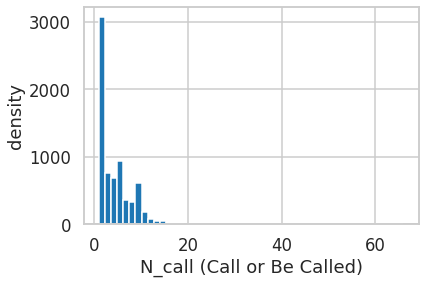

In [198]:
plt.hist(df_share_exclusive['N_call'], density=False, bins=50)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('N_call (Call or Be Called)');

# What is Friendship Network (reciprocal friendships)

In [88]:
df_A = df_part.copy()
df_B = df_part.copy()

In [95]:
df_A = df_A.rename(columns={"user_id": "userid_x", "tgt": "userid_y"})
df_B = df_B.rename(columns={"user_id": "userid_y", "tgt": "userid_x"})

In [101]:
df_inner = pd.merge(df_A, df_B, on =['userid_x', 'userid_y'])

In [106]:
df_reciprocal = df_inner.groupby(by=['userid_x', 'userid_y']).size().reset_index(name='N_contact')

More than 30 reciprocal contact

In [108]:
df_reciprocal_valid  = df_reciprocal[df_reciprocal['N_contact']>=30]

In [110]:
len(set(df_reciprocal_valid['userid_x'].tolist()))

15172

In [115]:
df_friend  = df_reciprocal_valid[['userid_x', 'userid_y']]

In [116]:
df_friend

,userid_x,userid_y
0,0002D18309AF4230C09139D2FBB59E72,3BA8D5135A90138C4E6362AE76C782A6
1,0002D18309AF4230C09139D2FBB59E72,449F84BCECF4268C339AC12CC27FFBCD
2,0002D18309AF4230C09139D2FBB59E72,5672F56621984155A125C65413703167
8,0002D18309AF4230C09139D2FBB59E72,EDBA2EEBAD0BD771EE6AF192584996D1
9,0002D18309AF4230C09139D2FBB59E72,F0ED8A818412FF5672D37C0CA4A5C14F
...,...,...
121406,FFE9AF4BA28A89127C6E6C3E5F87619F,1163166C1622D09347BED387F0196675
121408,FFECCF551C24275D89C9E9E75F981165,CEAA93B4931D932443D66766430104B2
121416,FFFC7713CD9614B5463E72F394A62B2A,752200F7D3D26E9054F0B5898A53D87D
121417,FFFC7713CD9614B5463E72F394A62B2A,7E5012C68BDB1E25BE1996C549323FBF


# DF checkins

In [31]:
df_checkin = df_part[['user_id', 'lat', 'lon', 'location_id', 'created_at']].copy()

In [42]:
df_checkin.columns = ['userid', 'lat', 'lon', 'placeid', 'datetime']

In [43]:
df_checkin

,userid,lat,lon,placeid,datetime
2,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 12:03:14
3,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 12:21:56
6,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 16:25:26
7,0002D18309AF4230C09139D2FBB59E72,-22.70589,-43.29072,322,2014-01-09 16:31:49
11,0002D18309AF4230C09139D2FBB59E72,-22.72407,-43.31827,1169,2014-01-09 17:22:55
...,...,...,...,...,...
22116204,FFFE9D2D90DC0169BDD243FA2276D569,-22.88160,-43.57130,172,2014-06-23 11:56:29
22116205,FFFE9D2D90DC0169BDD243FA2276D569,-22.88160,-43.57130,172,2014-06-23 12:11:20
22116207,FFFE9D2D90DC0169BDD243FA2276D569,-22.87065,-43.55858,178,2014-06-23 12:15:46
22116219,FFFE9D2D90DC0169BDD243FA2276D569,-22.94383,-43.18235,963,2014-06-24 09:43:16


# Let's Focus on Main Results

In [44]:
co_locationship = cl.Co_Locationship(df_checkin, mins_records=150, missing='-')

In [45]:
print('There are', co_locationship.pdata['userid'].count(), 'valid check-ins records, \n'
      'There are', co_locationship.pdata['userid'].nunique(), 'valid users, \n'
      'There are', co_locationship.pdata['placeid'].nunique(), 'distinct placeid. \n'
     )

There are 1382626 valid check-ins records, 
There are 4415 valid users, 
There are 1816 distinct placeid. 



In [46]:
# First time, should run co_locationship
placeidT = co_locationship()

In [47]:
# cl.util.save_object(placeidT, 'BZR_placeidT_150.pickle')

In [48]:
# Run in the first time (it takes 30 mins)
cln = co_locationship.build_network(freq='H')
cln.to_csv('BZR_raw_meetup_150.csv', index=False)

In [49]:
print(co_locationship.network['userid_x'].nunique(), co_locationship.network['userid_y'].nunique())

4415 4415


In [50]:
# Run in the first time (it takes 6 hours)
cln_details = co_locationship.calculate_info()
cln_details.to_csv('BZR_CLN_CE_info_150.csv', index=False)

In [51]:
print(co_locationship.network_details['userid_x'].nunique(), 
      co_locationship.network_details['userid_y'].nunique())

4415 4415


In [52]:
cln_filtered = co_locationship.network_control(quality=True, 
                                contribution=True, 
                                num_alters=10, 
                                by=['userid_x', 'meetup', 'N_previous'], 
                                ascending=[True, False, True],
                                N_previous=150)

In [53]:
print(cln_filtered['userid_x'].nunique(), cln_filtered['userid_y'].nunique())

3608 4346


In [54]:
# Run in the first time (it takes 1 hour)
co_locationship.calculate_network(verbose=False, filesave=True, name='BZR')

# # The second time, you can just read the saved result
# co_locationship.network_details = pd.read_csv('BZR_CLN_network_details_H.csv')
# co_locationship.final_userlist = sorted(list(set(co_locationship.network_details['userid_x'].tolist())))

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
235,0002D18309AF4230C09139D2FBB59E72,EDBA2EEBAD0BD771EE6AF192584996D1,14,198,350,2.542571,0.649312,1,2.542571,0.649312,1.863818,0.765044,1.863818,0.765044,1.945826,0.751893,0.40,0.40
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,2,2.022642,0.739375,1.821687,0.771715,1.774596,0.779105,1.945826,0.751893,0.32,0.44
73,0002D18309AF4230C09139D2FBB59E72,5672F56621984155A125C65413703167,14,217,330,2.704780,0.619158,3,1.967648,0.748357,1.917357,0.756483,1.745602,0.783619,1.945826,0.751893,0.40,0.48
143,0002D18309AF4230C09139D2FBB59E72,9D8511DE05DD3AFA4EFEA50F95BDE8DA,12,161,439,2.074827,0.730760,4,1.823639,0.771407,1.818553,0.772209,1.692076,0.791883,1.945826,0.751893,0.32,0.52
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,5,1.931896,0.754142,2.213912,0.707350,1.792025,0.776378,1.945826,0.751893,0.28,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,13,1.301202,0.849489,1.342017,0.843700,1.194281,0.864405,1.386503,0.837329,0.48,0.80
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,14,1.300320,0.849614,1.385319,0.837499,1.193696,0.864486,1.386503,0.837329,0.12,0.80
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,15,1.298767,0.849833,1.414110,0.833344,1.192803,0.864609,1.386503,0.837329,0.40,0.80
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,16,1.301678,0.849422,1.443539,0.829069,1.195609,0.864222,1.386503,0.837329,0.32,0.80


# Social-Relationship Network Experiment

In [121]:
social_relationship = cl.Social_Relationship(df_checkin,df_friend, 
                                             mins_records=150, 
                                             missing='-')

In [122]:
srn = social_relationship.network
print('There are', srn['userid_x'].nunique(), 'valid egos \n' 
     'There are', srn['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(srn['userid_x'].tolist() + srn['userid_y'].tolist())), 'total users \n' 
     )

There are 3992 valid egos 
There are 3992 valid alters 
There are 3992 total users 



In [123]:
# given the same time unit, we can just the placeid sequence generated by co-locationship
# otherwise, also run `social_relationship()` to generate placeid sequence again.
social_relationship.placeidT = placeidT

In [124]:
# Run in the first time (it takes 16 mins)
srn_details = social_relationship.calculate_info()
srn_details.to_csv('BZR_SRN_CE_info_reciprocal_30.csv', index=False)

# # The second time, you can just read the saved result
# social_relationship.network_details = pd.read_csv('BZR_SRN_CE_info_reciprocal_30.csv')

In [125]:
srn_filtered = social_relationship.network_control(
                                contribution=True, 
                                num_alters=10, 
                                by=['userid_x', 'meetup', 'N_previous'], 
                                ascending=[True, False, True],
                                N_previous=150,
                                freq='H')

In [127]:
print('There are', srn_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', srn_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(srn_filtered['userid_x'].tolist() + srn_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 488 valid egos 
There are 2085 valid alters 
There are 2096 total users 



In [126]:
# Run in the first time (it takes 28 hour)
social_relationship.calculate_network(verbose=False, filesave=True, name='BZR_reciprocal_30')

# # The second time, you can just read the saved result
# social_relationship.network_details = pd.read_csv('SRN_network_details_H.csv')
# social_relationship.final_userlist = sorted(list(set(social_relationship.network_details['userid_x'].tolist())))

,userid_x,userid_y,N_previous,n_prev_match,CE_alter,Pi_alter,meetup,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
377,00CE7F32CB6B7A3577EA93DE08496E27,15A83E1100CED2ADE6B3C0792F3448A7,1122,1967,2.532296,0.704874,84,1,2.532296,0.704874,2.067269,0.770289,2.067269,0.770289,2.363722,0.729108,0.520000,0.520000
378,00CE7F32CB6B7A3577EA93DE08496E27,15D4EF699C0FD3AF864017864B533900,1052,1642,2.869405,0.654571,81,2,2.435673,0.718838,2.217738,0.749614,2.055069,0.771945,2.363722,0.729108,0.440000,0.560000
412,00CE7F32CB6B7A3577EA93DE08496E27,D05BC58E69243459E909A8AB7ED65BD0,681,1485,2.909900,0.648357,55,3,2.200780,0.751967,2.251497,0.744911,1.990457,0.780665,2.363722,0.729108,0.560000,0.760000
418,00CE7F32CB6B7A3577EA93DE08496E27,FE813BF3D1D757442B86B7CD13A227A1,396,1286,2.943462,0.643179,48,4,2.139595,0.760409,2.186486,0.753946,1.950004,0.786080,2.363722,0.729108,0.500000,0.760000
383,00CE7F32CB6B7A3577EA93DE08496E27,26B9871EE3EF46E0FC3FF930E8DA760F,1087,876,4.360864,0.395797,41,5,2.145603,0.759583,2.446110,0.717339,1.966516,0.783874,2.363722,0.729108,0.280000,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121101,FF12018BE43C720B803F4A9CE9406B42,EF4B88EDEA7E9B76C2B609D9C8658D3B,375,267,5.038363,0.136845,10,7,2.717217,0.654332,2.372435,0.709313,2.201832,0.735361,2.472987,0.693608,0.162162,0.783784
121092,FF12018BE43C720B803F4A9CE9406B42,C3E8417F171F808A34CE5380E3A162DD,425,440,4.066451,0.401406,6,8,2.578667,0.676813,2.373413,0.709162,2.162452,0.741268,2.472987,0.693608,0.243243,0.783784
121100,FF12018BE43C720B803F4A9CE9406B42,DFA6B76B51736342A0B680C37EC09570,669,418,4.489931,0.302605,6,9,2.552227,0.681043,2.394422,0.705902,2.146290,0.743681,2.472987,0.693608,0.216216,0.783784
121095,FF12018BE43C720B803F4A9CE9406B42,D122CD55C471948888C8B23DCE6B057C,323,287,4.764857,0.228244,1,10,2.520572,0.686083,2.361235,0.711046,2.124294,0.746955,2.472987,0.693608,0.216216,0.783784


# Non-social co-location network

In [129]:
pair = []
for a,b in zip(df_friend.userid_x, df_friend.userid_y): 
     pair.append((a, b))

In [130]:
non_social_co_locationship = copy.deepcopy(co_locationship)

In [131]:
exclude_network = cln_filtered[~cln_filtered[['userid_x', 
                                              'userid_y']].apply(tuple, axis=1).isin(pair)]
non_social_co_locationship.network_details = exclude_network

In [132]:
non_social_cln_filtered = non_social_co_locationship.network_control(quality=True, 
                                                                    contribution=True, 
                                                                    num_alters=10, 
                                                                    by=['userid_x', 'meetup', 'N_previous'], 
                                                                    ascending=[True, False, True],
                                                                    N_previous=150)

In [133]:
print('There are', non_social_cln_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', non_social_cln_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(non_social_cln_filtered['userid_x'].tolist() + non_social_cln_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 3463 valid egos 
There are 4329 valid alters 
There are 4330 total users 



In [134]:
# Run in the first time (it takes 4 hour)
non_social_co_locationship.calculate_network(verbose=False, filesave=True, name='non_reciprocal_social_30')

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,1,2.173451,0.714228,1.821687,0.771715,1.821687,0.771715,1.945826,0.751893,0.32,0.32
143,0002D18309AF4230C09139D2FBB59E72,9D8511DE05DD3AFA4EFEA50F95BDE8DA,12,161,439,2.074827,0.730760,2,1.888434,0.761119,1.818553,0.772209,1.736135,0.785087,1.945826,0.751893,0.32,0.36
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,3,2.068660,0.731783,2.213912,0.707350,1.883430,0.761919,1.945826,0.751893,0.28,0.52
123,0002D18309AF4230C09139D2FBB59E72,87E1A9F80264D1EA43DC9794714BC96C,11,503,225,3.927784,0.346334,4,2.073183,0.731033,2.139099,0.720024,1.900520,0.759185,1.945826,0.751893,0.44,0.60
67,0002D18309AF4230C09139D2FBB59E72,4E26219CBFFE91D73B2AED3AE62E3410,10,521,361,2.923875,0.576680,5,2.068713,0.731774,2.089216,0.728368,1.907393,0.758083,1.945826,0.751893,0.40,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,9,1.320113,0.846813,1.342017,0.843700,1.199884,0.863633,1.386503,0.837329,0.48,0.72
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,10,1.321166,0.846664,1.385319,0.837499,1.200858,0.863498,1.386503,0.837329,0.12,0.72
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,11,1.323816,0.846288,1.414110,0.833344,1.203300,0.863161,1.386503,0.837329,0.40,0.72
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,12,1.333056,0.844975,1.443539,0.829069,1.211138,0.862078,1.386503,0.837329,0.32,0.72


# No_call_history_colocation network

In [200]:
call_pair = []
for a,b in zip(df_call_info.userid_x, df_call_info.userid_y): 
     call_pair.append((a, b))

In [201]:
non_call_co_locationship = copy.deepcopy(co_locationship)

In [203]:
exclude_call_network = cln_filtered[~cln_filtered[['userid_x', 
                                                   'userid_y']].apply(tuple, axis=1).isin(call_pair)]
non_call_co_locationship.network_details = exclude_call_network

In [204]:
non_call_cln_filtered = non_call_co_locationship.network_control(quality=True, 
                                                                    contribution=True, 
                                                                    num_alters=10, 
                                                                    by=['userid_x', 'meetup', 'N_previous'], 
                                                                    ascending=[True, False, True],
                                                                    N_previous=150)

In [205]:
print('There are', non_call_cln_filtered['userid_x'].nunique(), 'valid egos \n' 
     'There are', non_call_cln_filtered['userid_y'].nunique(), 'valid alters \n' 
     'There are', len(set(non_call_cln_filtered['userid_x'].tolist() + non_call_cln_filtered['userid_y'].tolist())), 'total users \n' 
     )

There are 3347 valid egos 
There are 4305 valid alters 
There are 4306 total users 



In [206]:
# Run in the first time (it takes XXX hour)
non_call_co_locationship.calculate_network(verbose=False, filesave=True, name='no_call')

,userid_x,userid_y,meetup,N_previous,n_prev_match,CE_alter,Pi_alter,Rank,CCE_alters,Pi_alters,CCE_ego_alter,Pi_ego_alter,CCE_ego_alters,Pi_ego_alters,LZ_entropy,Pi,ODLR,CODLR
11,0002D18309AF4230C09139D2FBB59E72,0A5900898073025A1F432EF4653AFCEB,14,201,436,2.173451,0.714228,1,2.173451,0.714228,1.821687,0.771715,1.821687,0.771715,1.945826,0.751893,0.32,0.32
90,0002D18309AF4230C09139D2FBB59E72,659BE695FD0B3BEAD95ABEF949E492BA,12,774,380,3.010154,0.559355,2,2.365451,0.681078,2.213912,0.707350,1.997088,0.743561,1.945826,0.751893,0.28,0.48
123,0002D18309AF4230C09139D2FBB59E72,87E1A9F80264D1EA43DC9794714BC96C,11,503,225,3.927784,0.346334,3,2.321956,0.688702,2.139099,0.720024,2.002115,0.742739,1.945826,0.751893,0.44,0.56
67,0002D18309AF4230C09139D2FBB59E72,4E26219CBFFE91D73B2AED3AE62E3410,10,521,361,2.923875,0.576680,4,2.236727,0.703446,2.089216,0.728368,1.996088,0.743724,1.945826,0.751893,0.40,0.64
49,0002D18309AF4230C09139D2FBB59E72,3B57ACCD63A7A12490F30D63580E4205,8,213,185,3.785168,0.383997,5,2.192516,0.710994,1.941393,0.752609,1.965752,0.748664,1.945826,0.751893,0.52,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,FFDDC356739ABE744793623DC6F4D06C,BAF7CA4E3E172453754B13AE8C6EE9A9,2,187,722,1.853208,0.766729,8,1.338028,0.844268,1.342017,0.843700,1.212027,0.861955,1.386503,0.837329,0.48,0.68
73,FFDDC356739ABE744793623DC6F4D06C,A240C07F9AB7E8694941EE525AD0EA88,2,286,203,4.378013,0.204562,9,1.338403,0.844214,1.385319,0.837499,1.212587,0.861877,1.386503,0.837329,0.12,0.68
54,FFDDC356739ABE744793623DC6F4D06C,737D826410C4CF848FE463EA134A099B,2,313,281,3.775493,0.386471,10,1.338656,0.844178,1.414110,0.833344,1.213348,0.861772,1.386503,0.837329,0.40,0.68
13,FFDDC356739ABE744793623DC6F4D06C,1FFE6122F30D1B13B719EA353E441A6E,2,394,308,3.731459,0.397613,11,1.346411,0.843073,1.443539,0.829069,1.220858,0.860732,1.386503,0.837329,0.32,0.68


# Comparison between social vs non-social

In [135]:
compare_v3 = cl.ComparisonNetwork([social_relationship, non_social_co_locationship], 
                                  ['social network', 'non-social co-location network'])

In [136]:
compare_v3()

There are 484 common users.


/home/zchen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.p

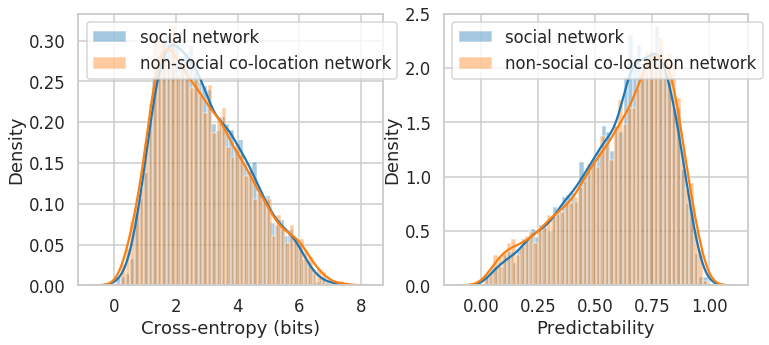

In [137]:
CE_v3 = compare_v3.plot_histogram(l=12,w=5)

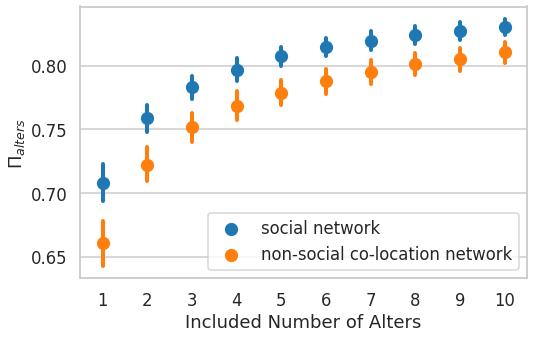

In [138]:
CCP_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCP alters', l=8,w=5)

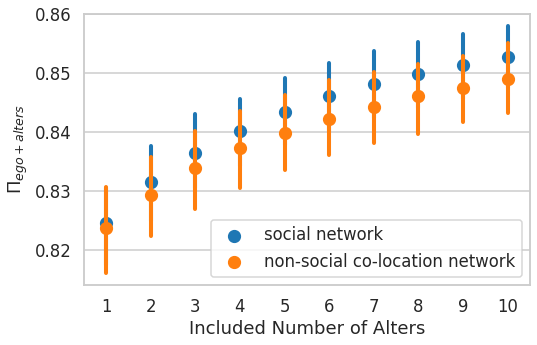

In [139]:
CCP_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCP ego+alters', l=8,w=5)

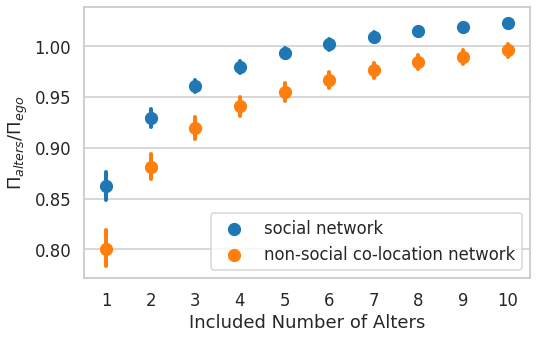

In [140]:
RCCP_alters_errorbar_v3 = compare_v3.plot_errorbar(target="RCCP alters", l=8,w=5)

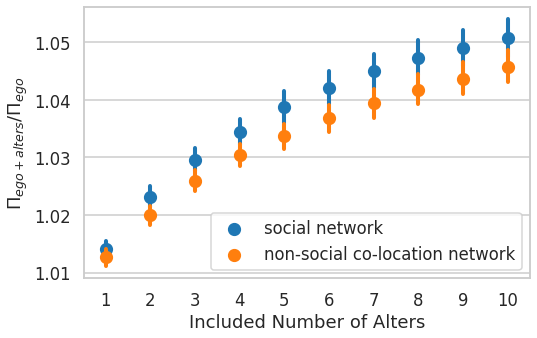

In [141]:
RCCP_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='RCCP ego+alters', l=8,w=5)

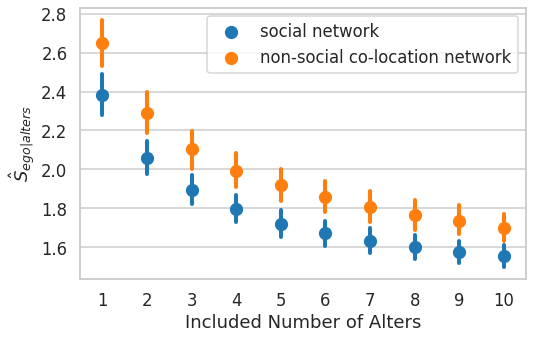

In [142]:
CCE_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCE alters', l=8,w=5)

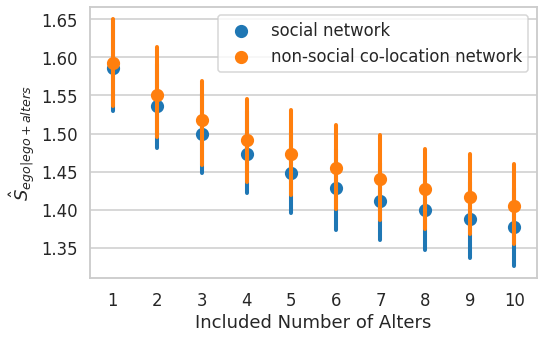

In [143]:
CCE_ego_alters_errorbar_v3 = compare_v3.plot_errorbar(target='CCE ego+alters', l=8,w=5)

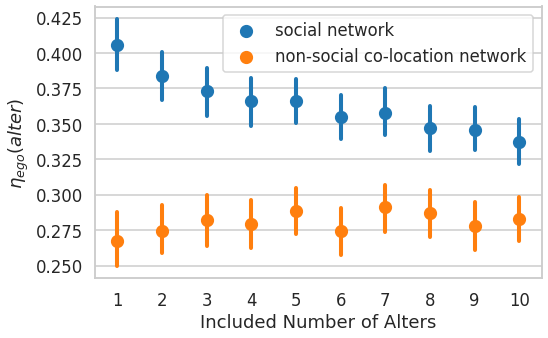

In [144]:
ODLR_errorbar_v3 = compare_v3.plot_errorbar(target='ODLR', l=8,w=5)

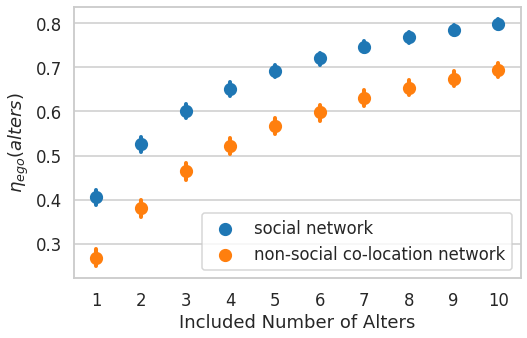

In [145]:
CODLR_errorbar_v3 = compare_v3.plot_errorbar(target='CODLR', l=8,w=5)

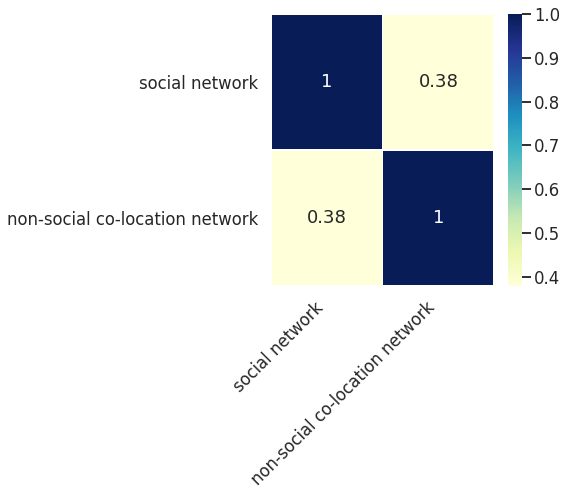

In [146]:
local_sim_v3 = compare_v3.plot_similarity(local=False, l=5,w=5)

In [147]:
compare_v3.statistics.to_csv('BZR_reciprocal_30_stats_non_social_vs_social.csv', index=False)

In [148]:
compare_v3.data.to_csv('BZR_reciprocal_30_common_top10_details.csv', index=False)

# Comparison between social vs no call colocationship

In [208]:
compare_v4 = cl.ComparisonNetwork([social_relationship, non_call_co_locationship], 
                                  ['social network', 'non-social co-location network']) 

In [209]:
compare_v4()

There are 483 common users.


/home/zchen/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/zchen/.local/lib/python3.6/site-packages/matplotlib/axes/_base.p

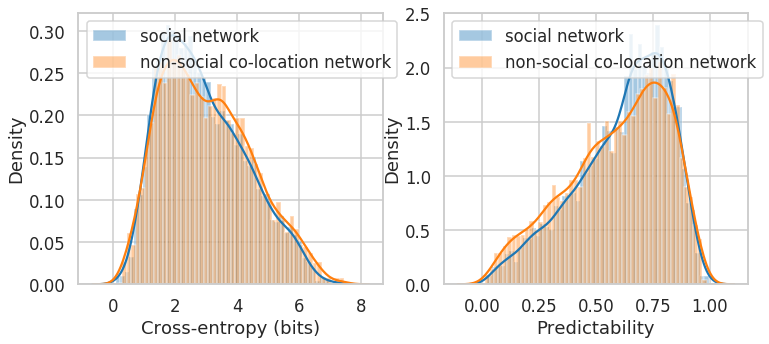

In [211]:
CE_v4 = compare_v4.plot_histogram(l=12,w=5)

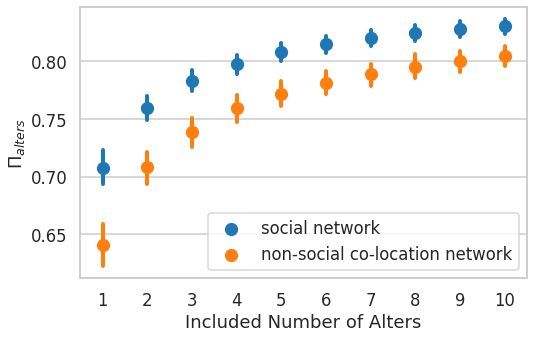

In [212]:
CCP_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCP alters', l=8,w=5)

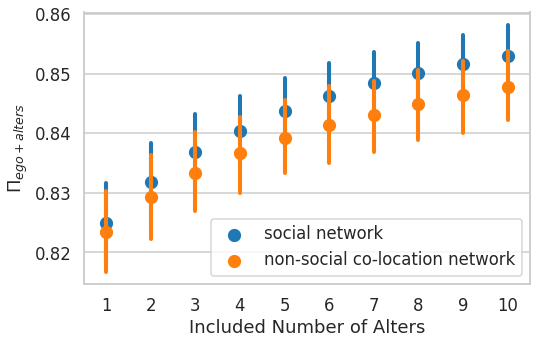

In [213]:
CCP_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCP ego+alters', l=8,w=5)

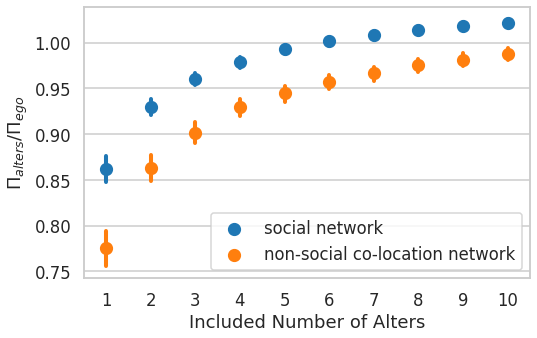

In [214]:
RCCP_alters_errorbar_v4 = compare_v4.plot_errorbar(target="RCCP alters", l=8,w=5)

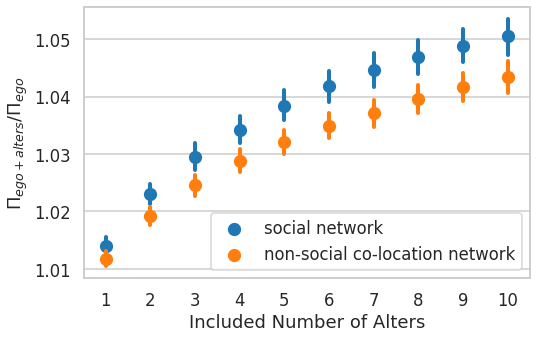

In [215]:
RCCP_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='RCCP ego+alters', l=8,w=5)

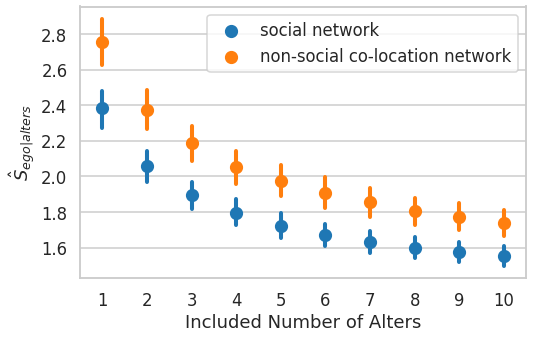

In [217]:
CCE_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCE alters', l=8,w=5)

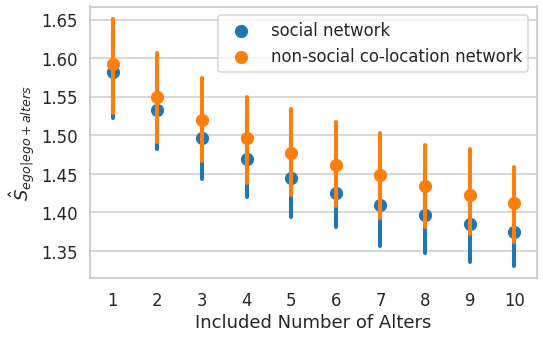

In [218]:
CCE_ego_alters_errorbar_v4 = compare_v4.plot_errorbar(target='CCE ego+alters', l=8,w=5)

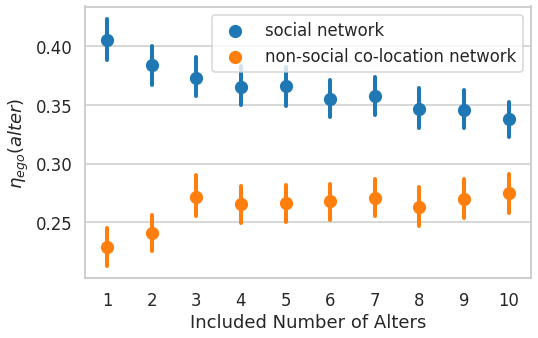

In [219]:
ODLR_errorbar_v4 = compare_v4.plot_errorbar(target='ODLR', l=8,w=5)

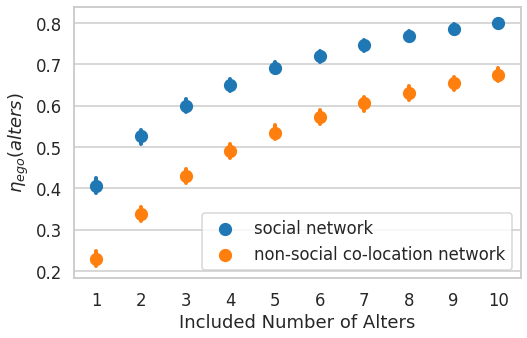

In [220]:
CODLR_errorbar_v4 = compare_v4.plot_errorbar(target='CODLR', l=8,w=5)

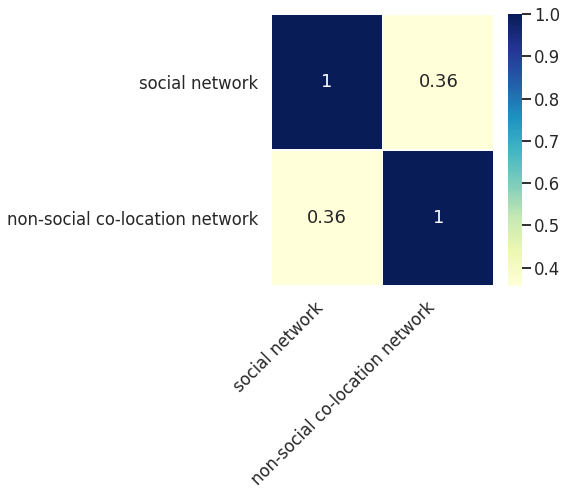

In [221]:
local_sim_v4 = compare_v4.plot_similarity(local=False, l=5,w=5)

In [222]:
compare_v4.statistics.to_csv('BZR_reciprocal_30_stats_no_call_history_vs_social.csv', index=False)

In [223]:
compare_v4.data.to_csv('BZR_reciprocal_30_no_call_common_top10_details.csv', index=False)

# Basic Info BZR

In [225]:
def basic_info(user):
    seq = placeidT[user]['placeid'].astype(str).values.tolist()
    shannon_entropy = cl.util.shannon_entropy(seq)
    LZ_entropy = cl.util.LZ_entropy(seq, e=2)
    N_unique = len(set(seq))
    shannon_Pi = cl.util.getPredictability(N=N_unique, S=shannon_entropy, e=2)
    LZ_Pi = cl.util.getPredictability(N=N_unique, S=LZ_entropy, e=2)
    return [user, shannon_entropy, shannon_Pi, LZ_entropy, LZ_Pi]

In [228]:
BZR_basic_list = [basic_info(user) for user in co_locationship.userlist]
BZR_basic_info = pd.DataFrame(BZR_basic_list, columns=['userid',
                                                     'Shannon Entropy',
                                                     'Shannon Pi',
                                                     'LZ Entropy',
                                                     'LZ Pi']
                             )

In [230]:
BZR_basic_info.to_csv('BZR-dataset-basic.csv', index=False)

# Compute the SW network

In [236]:
def network_sliding_windows(network, interval=1800, max_size=24):
    egolist = sorted(list(set(network['userid_x'].tolist())))
    
    network_time_pos = []
    for ego in egolist:
        ego_info = placeidT[ego]
        seq_ego_placeid = ego_info['placeid'].astype(str).values.tolist()
        seq_ego_time = ego_info.index.tolist()
        
        alterslist = network[network['userid_x'] == ego]['userid_y'].tolist()
        ego_df = pd.concat([time_position(seq_ego_time, 
                                       seq_ego_placeid, 
                                       alter, 
                                       interval=interval, 
                                       max_size=max_size) for alter in alterslist]
                          )
        ego_df.insert(0,'userid_x',ego)
        network_time_pos.append(ego_df)
        print(ego)
    
    network_time_pos = pd.concat(network_time_pos)
#     network_time_pos.to_csv('network_time_windows.csv', index=False)
    
    return network_time_pos

def time_position(seq_ego_time, seq_ego_placeid, alter, interval=1800, max_size=24):
    alter_info = placeidT[alter]
    seq_alter_placeid = alter_info['placeid'].astype(str).values.tolist()
    
    shared_placeid = list(set(seq_alter_placeid) & set(seq_ego_placeid))
    seq_alter_time = alter_info.index.tolist()

    container = []
    for t, w in zip(seq_ego_time, seq_ego_placeid):
        if w in shared_placeid:
            ids = cl.util.fast_indices(seq_alter_placeid, w)
            
            placeid_pos = pd.DataFrame([[w, time_diff(t, seq_alter_time[i], interval=interval, max_size=max_size)] 
                                        for i in ids], 
                                      columns=['placeid', 'time-pos'])
            container.append(placeid_pos)
    df_time_pos = pd.concat(container).groupby('time-pos',dropna=True).size().reset_index(name='meetup')    
    df_time_pos.insert(0,'userid_y',alter)
    
    return df_time_pos

def time_diff(a, b, interval=1800, max_size = 24):
    diff = (b - a).total_seconds()/ interval
    if (diff <=max_size) & (diff >= -max_size):
        return int_towards_infty(diff)
    
def int_towards_infty(x):
    if x >= 0 :
        return np.ceil(x)
    else:
        return np.floor(x)

In [ ]:
total_network = network_sliding_windows(co_locationship.network, interval=1800, max_size=1)

0002D18309AF4230C09139D2FBB59E72
000666508374BD75CBD39B7355C95AC4
000C37842EC8CCCC501A9E40F53D0239
000CC8340F37807A6DAFA3ABE430CFFF
0015A0C9D14A4E3D0A9C6B69725619A7
001CD901ACFD275317421B3A1CBBE039
0072D75D498C60DCB18F3A6CBCA7CFEE
007E99026EB91A993EB73DFC83F58B1D
00863F8EE1A96861FF1A5B9674F8FF1E
00A185C4E9240A4C0B63784FFDE559AB
00AA601D55AF1DA362A6AC0AEBAE0602
00AB8C0EF923CB7FAF7B79B93E9E05B4
00C44509DD8A0CF234D8303B8C5DBF1F
